In [76]:
import seaborn as sns 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [77]:
train_dict = {
    "BRAIN0": {
        "chrXY": {
            "mean_auc": 0.9770597651121383,
            "mean_accuracy": 0.9325337331334332,
            "mean_f1": 0.933920704845815,
            "mean_precision": 0.9034090909090909,
            "mean_recall": 0.9665653495440729,
            "n_features": 10
        },
        "chrX": {
            "mean_auc": 0.976772000503588,
            "mean_accuracy": 0.9325337331334332,
            "mean_f1": 0.933920704845815,
            "mean_precision": 0.9034090909090909,
            "mean_recall": 0.9665653495440729,
            "n_features": 9
        },
        "chrY": {
            "mean_auc": 0.894093631409507,
            "mean_accuracy": 0.8065967016491754,
            "mean_f1": 0.8012326656394453,
            "mean_precision": 0.8125,
            "mean_recall": 0.790273556231003,
            "n_features": 80
        },
        "autosome": {
            "mean_auc": 0.8867646265354939,
            "mean_accuracy": 0.7931034482758621,
            "mean_f1": 0.784375,
            "mean_precision": 0.8070739549839229,
            "mean_recall": 0.7629179331306991,
            "n_features": 91
        }
    },
    "HEART": {
        "chrXY": {
            "mean_auc": 0.9986016438553263,
            "mean_accuracy": 0.992503748125937,
            "mean_f1": 0.9923664122137404,
            "mean_precision": 0.9969325153374233,
            "mean_recall": 0.9878419452887538,
            "n_features": 9
        },
        "chrX": {
            "mean_auc": 0.9981834859085268,
            "mean_accuracy": 0.992503748125937,
            "mean_f1": 0.9923430321592649,
            "mean_precision": 1.0,
            "mean_recall": 0.9848024316109423,
            "n_features": 8
        },
        "chrY": {
            "mean_auc": 0.8752540421934858,
            "mean_accuracy": 0.800599700149925,
            "mean_f1": 0.7969465648854962,
            "mean_precision": 0.8006134969325154,
            "mean_recall": 0.7933130699088146,
            "n_features": 93
        },
        "autosome": {
            "mean_auc": 0.8644268987967842,
            "mean_accuracy": 0.7856071964017991,
            "mean_f1": 0.781010719754977,
            "mean_precision": 0.7870370370370371,
            "mean_recall": 0.7750759878419453,
            "n_features": 82
        }
    },
    "BRAIN1": {
        "chrXY": {
            "mean_auc": 0.9996402942393122,
            "mean_accuracy": 0.9865067466266867,
            "mean_f1": 0.9862595419847329,
            "mean_precision": 0.99079754601227,
            "mean_recall": 0.9817629179331308,
            "n_features": 7
        },
        "chrX": {
            "mean_auc": 0.9991636841064009,
            "mean_accuracy": 0.9895052473763118,
            "mean_f1": 0.9892802450229708,
            "mean_precision": 0.9969135802469136,
            "mean_recall": 0.9817629179331308,
            "n_features": 5
        },
        "chrY": {
            "mean_auc": 0.9977068757756156,
            "mean_accuracy": 0.9895052473763118,
            "mean_f1": 0.989345509893455,
            "mean_precision": 0.9908536585365854,
            "mean_recall": 0.9878419452887538,
            "n_features": 5
        },
        "autosome": {
            "mean_auc": 0.8797143936260139,
            "mean_accuracy": 0.8050974512743628,
            "mean_f1": 0.8006134969325154,
            "mean_precision": 0.8080495356037152,
            "mean_recall": 0.7933130699088146,
            "n_features": 59
        }
    },
    "None": {
        "chrXY": {
            "mean_auc": 0.9955621301775148,
            "mean_accuracy": 0.9865067466266867,
            "mean_f1": 0.9862174578866769,
            "mean_precision": 0.9938271604938271,
            "mean_recall": 0.9787234042553191,
            "n_features": 10
        },
        "chrX": {
            "mean_auc": 0.9986466070754123,
            "mean_accuracy": 0.992503748125937,
            "mean_f1": 0.9923664122137404,
            "mean_precision": 0.9969325153374233,
            "mean_recall": 0.9878419452887538,
            "n_features": 10
        },
        "chrY": {
            "mean_auc": 0.9944650276074171,
            "mean_accuracy": 0.9835082458770614,
            "mean_f1": 0.983206106870229,
            "mean_precision": 0.9877300613496932,
            "mean_recall": 0.9787234042553191,
            "n_features": 3
        },
        "autosome": {
            "mean_auc": 0.9074117371989712,
            "mean_accuracy": 0.8320839580209896,
            "mean_f1": 0.8318318318318318,
            "mean_precision": 0.8219584569732937,
            "mean_recall": 0.8419452887537994,
            "n_features": 82
        }
    }
}

In [78]:
eval_dict = {
    "BRAIN0": {
        "chrXY": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.9,
            "mean_f1": 0.92672679617638,
            "mean_precision": 1.0,
            "mean_recall": 0.8640000000000001
        },
        "chrX": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.9176470588235294,
            "mean_f1": 0.9406028368794326,
            "mean_precision": 1.0,
            "mean_recall": 0.8880000000000001
        },
        "chrY": {
            "mean_auc": 0.6609696969696971,
            "mean_accuracy": 0.5941176470588235,
            "mean_f1": 0.6516943521594685,
            "mean_precision": 0.8702777777777777,
            "mean_recall": 0.528
        },
        "autosome": {
            "mean_auc": 0.6857777777777777,
            "mean_accuracy": 0.6,
            "mean_f1": 0.6596054467684764,
            "mean_precision": 0.8724557434309756,
            "mean_recall": 0.536
        }
    },
    "HEART": {
        "chrXY": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.9700000000000001,
            "mean_f1": 0.968421052631579,
            "mean_precision": 0.9400000000000001,
            "mean_recall": 1.0
        },
        "chrX": {
            "mean_auc": 0.994949494949495,
            "mean_accuracy": 0.99,
            "mean_f1": 0.9894736842105264,
            "mean_precision": 0.9800000000000001,
            "mean_recall": 1.0
        },
        "chrY": {
            "mean_auc": 0.3262626262626262,
            "mean_accuracy": 0.43,
            "mean_f1": 0.30918964076858807,
            "mean_precision": 0.3431746031746032,
            "mean_recall": 0.28888888888888886
        },
        "autosome": {
            "mean_auc": 0.3828282828282828,
            "mean_accuracy": 0.5,
            "mean_f1": 0.3555555555555555,
            "mean_precision": 0.4222222222222222,
            "mean_recall": 0.31111111111111106
        }
    },
    "BRAIN1": {
        "chrXY": {
            "mean_auc": 0.9748552188552189,
            "mean_accuracy": 0.7386046511627906,
            "mean_f1": 0.7692246249220479,
            "mean_precision": 1.0,
            "mean_recall": 0.6253333333333333
        },
        "chrX": {
            "mean_auc": 0.9071784511784511,
            "mean_accuracy": 0.3693023255813953,
            "mean_f1": 0.1650782724446349,
            "mean_precision": 0.6,
            "mean_recall": 0.096
        },
        "chrY": {
            "mean_auc": 0.9791111111111112,
            "mean_accuracy": 0.6706976744186046,
            "mean_f1": 0.6887986198136304,
            "mean_precision": 1.0,
            "mean_recall": 0.528
        },
        "autosome": {
            "mean_auc": 0.5111649831649832,
            "mean_accuracy": 0.4576744186046512,
            "mean_f1": 0.5093544931152222,
            "mean_precision": 0.6905217584336483,
            "mean_recall": 0.404
        }
    }
}

In [79]:
# # TOTAL, HEART, BRAIN0, BRAIN1
# TOTAL_df = pd.DataFrame.from_dict(TOTAL)
# HEART_df = pd.DataFrame.from_dict(HEART)
# # BLOOD1_df = pd.DataFrame.from_dict(BLOOD1)
# BRAIN0_df = pd.DataFrame.from_dict(BRAIN0)
# BRAIN1_df = pd.DataFrame.from_dict(BRAIN1)
# TOTAL_df

TOTAL_df = pd.DataFrame.from_dict(train_dict['None'])
HEART_df = pd.DataFrame.from_dict(train_dict['HEART'])
BRAIN0_df = pd.DataFrame.from_dict(train_dict['BRAIN0'])
BRAIN1_df = pd.DataFrame.from_dict(train_dict['BRAIN1'])
TOTAL_df

,chrXY,chrX,chrY,autosome
mean_auc,0.995562,0.998647,0.994465,0.907412
mean_accuracy,0.986507,0.992504,0.983508,0.832084
mean_f1,0.986217,0.992366,0.983206,0.831832
mean_precision,0.993827,0.996933,0.987730,0.821958
mean_recall,0.978723,0.987842,0.978723,0.841945
n_features,10.000000,10.000000,3.000000,82.000000


<Axes: >

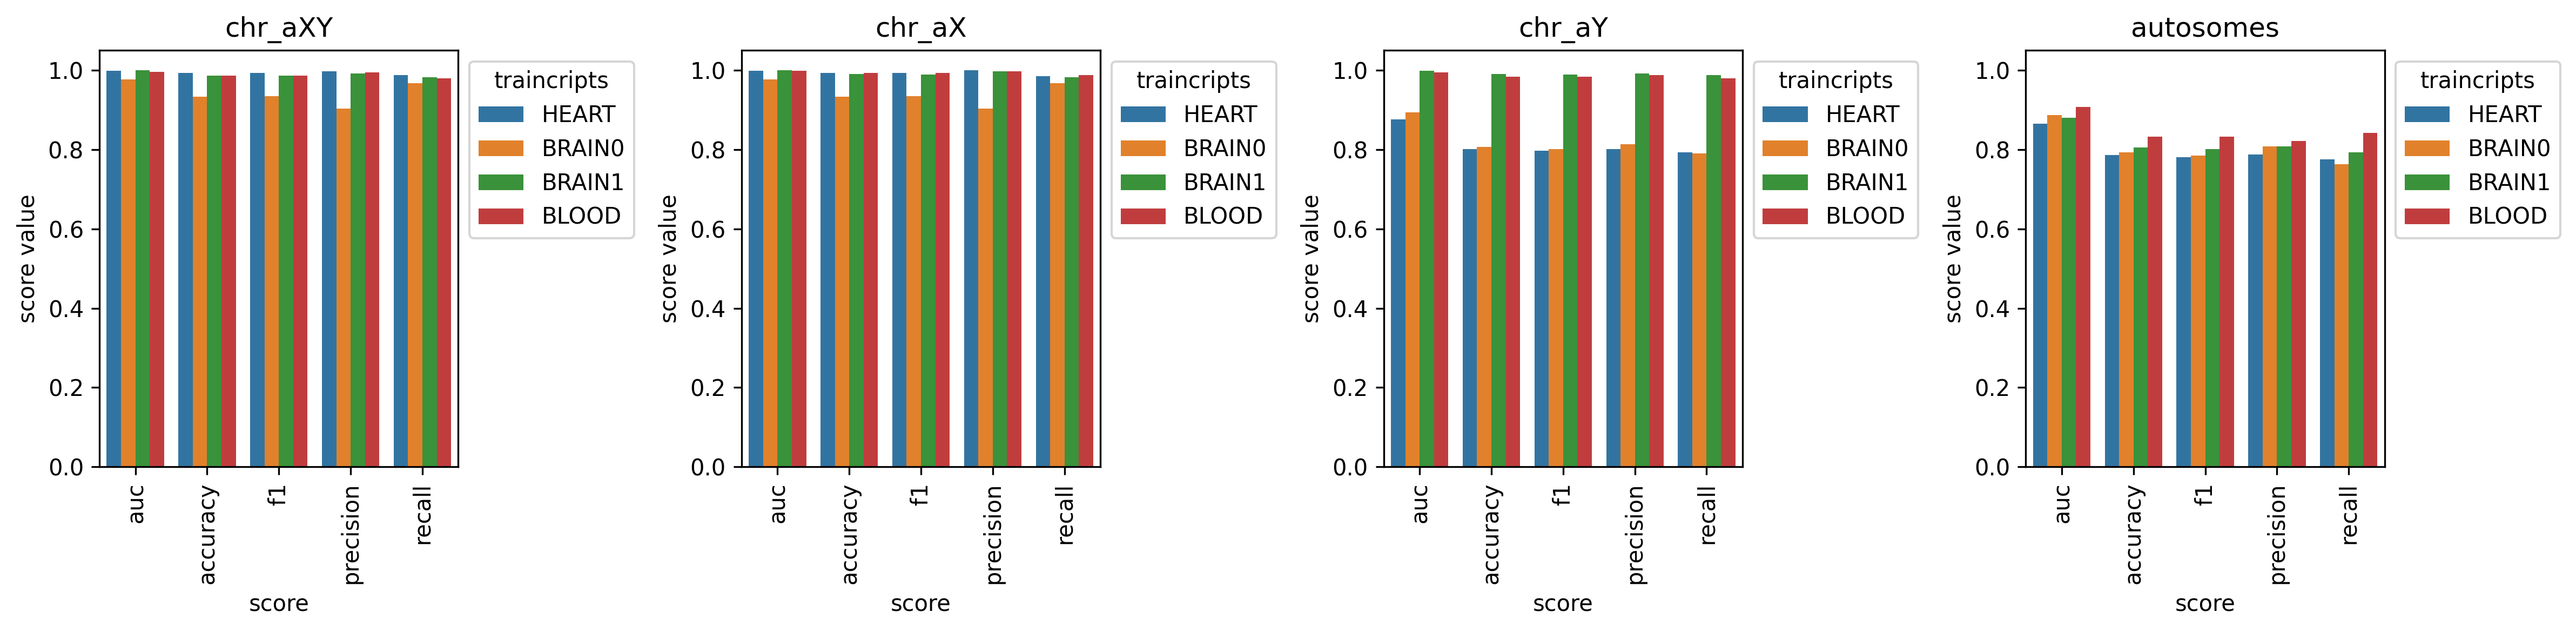

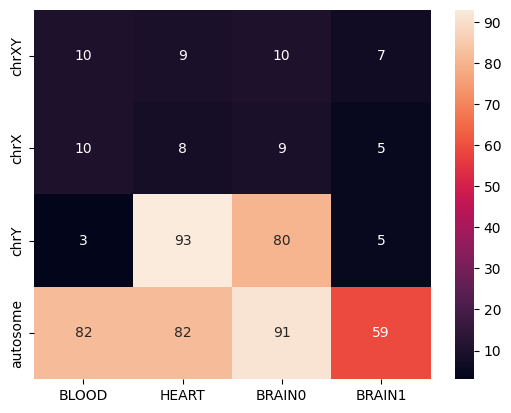

In [80]:
sex_chromosome_names = {
    'chrXY': 'chr_aXY',
    'autosome': "autosomes",
    'chrX': "chr_aX",
    'chrY': "chr_aY"
}

organ_names = {
    'BRAIN0': "BRAIN0",
    "HEART": "HEART",
    "BRAIN1": "BRAIN1",
    'None': "BLOOD"
}

df_features = pd.DataFrame(data=np.zeros((4, 4)), 
                           index=['chrXY', 'chrX', 'chrY', 'autosome'],
                           columns=["BLOOD", 'HEART', "BRAIN0", "BRAIN1"], )

fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((6, 4)), 
        columns=("BLOOD", 'HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )
    
    
    dset['HEART']=HEART_df[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_df[chromosome]
    dset['BRAIN1']=BRAIN1_df[chromosome]
    dset['BLOOD']=TOTAL_df[chromosome]
    
    # print(chromosome)
    # print(dset.loc['n_features'].values)
    
    
    df_features.loc[chromosome, "HEART"] = HEART_df[chromosome].loc['n_features']
    df_features.loc[chromosome, "BRAIN0"] = BRAIN0_df[chromosome].loc['n_features']
    df_features.loc[chromosome, "BRAIN1"] = BRAIN1_df[chromosome].loc['n_features']
    df_features.loc[chromosome, "BLOOD"] = TOTAL_df[chromosome].loc['n_features']
    
    dset = dset.drop(index='n_features')

    dset['score'] = dset.index.str[5:]


    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1', 'BLOOD'],
                ax=ax)
    g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(sex_chromosome_names[chromosome])

    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')
df_features = df_features.astype(int)

plt.savefig('../reports/for_paper/train_sex_scores.pdf', dpi=300)

plt.figure()
sns.heatmap(df_features, annot=True)

In [6]:

# HEART_eval_df = pd.DataFrame.from_dict(HEART_eval)
# BRAIN0_eval_df = pd.DataFrame.from_dict(BRAIN0_eval)
# BRAIN1_eval_df = pd.DataFrame.from_dict(BRAIN1_eval)


HEART_eval_df = pd.DataFrame.from_dict(eval_dict['HEART'])
BRAIN0_eval_df = pd.DataFrame.from_dict(eval_dict['BRAIN0'])
BRAIN1_eval_df = pd.DataFrame.from_dict(eval_dict['BRAIN1'])


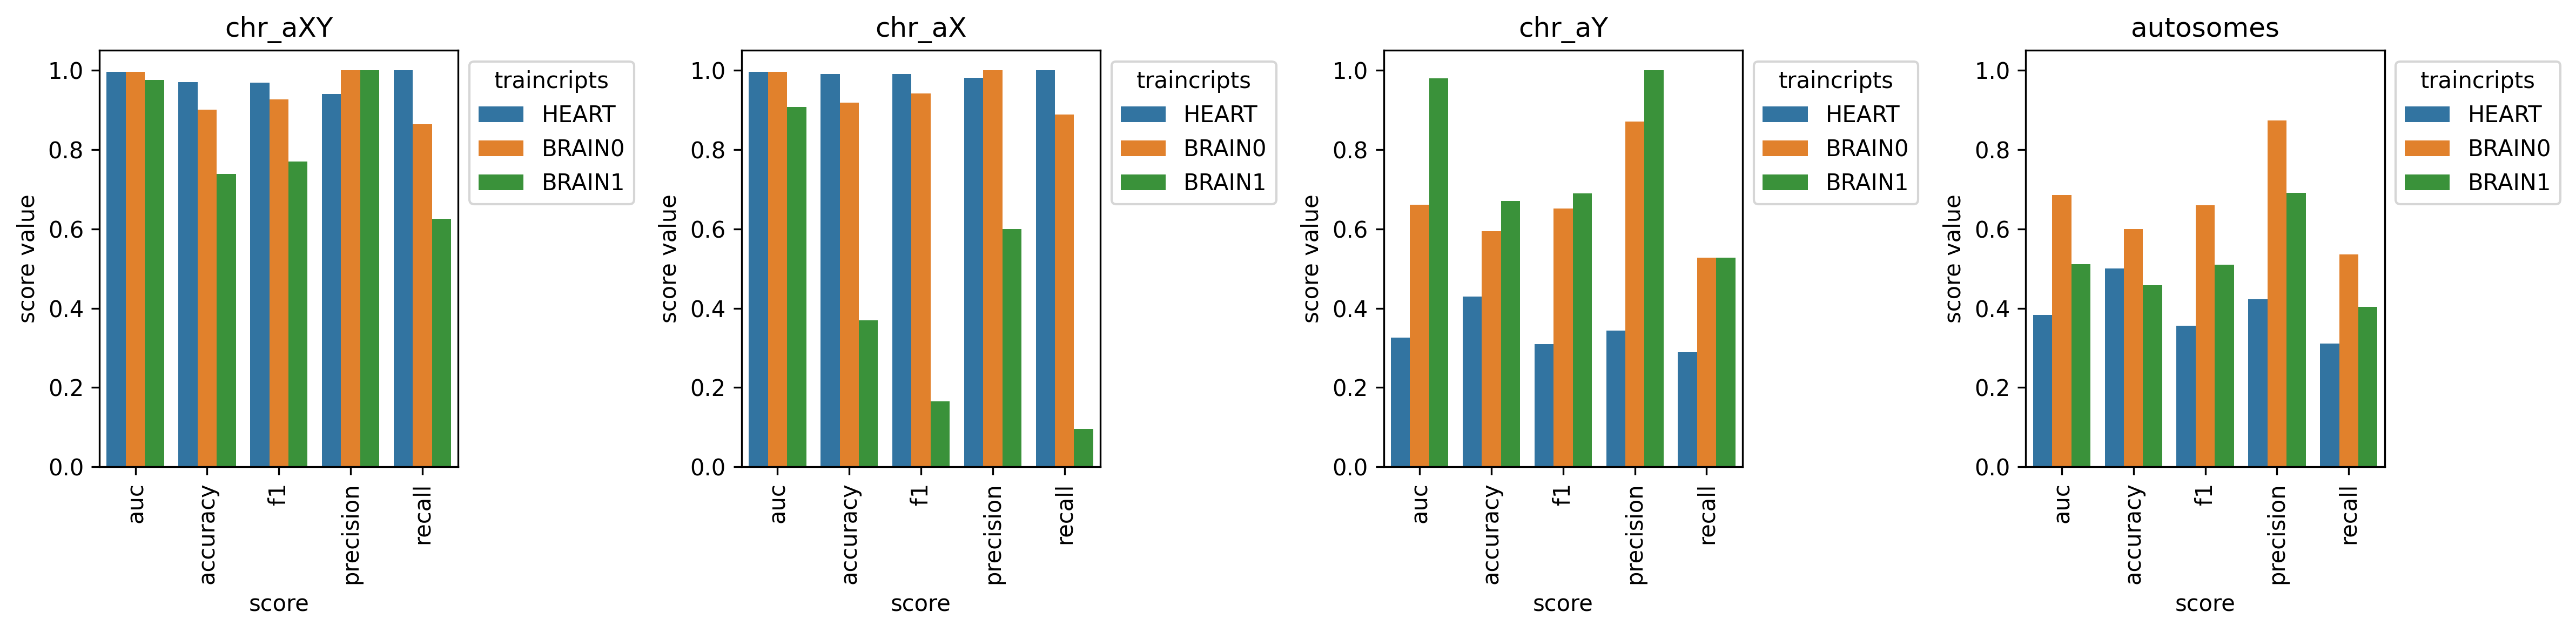

In [7]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

chromosome = 'chrXY'
for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 3)), 
        columns=('HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['HEART']=HEART_eval_df[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df[chromosome]

    dset['score'] = dset.index.str[5:]


    g = sns.barplot(dset.melt('score').rename(columns={'variable': 'traincripts', 'value': "score value"}),
                    x='score', y='score value', hue='traincripts',
                hue_order=['HEART', 'BRAIN0', 'BRAIN1'],
                ax=ax)
    g.set_ylim(0, 1.05)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(sex_chromosome_names[chromosome])
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')
plt.savefig('../reports/for_paper/eval_sex_scores.pdf', dpi=300)

#### Why there are no Y transcripts in autosomes+Y

In [8]:
from pathlib import Path

n_featues_dict = {
    'BRAIN0': {
        'chrXY': 10,
        'chrX': 9,
        'chrY': 80,
        'autosome': 91,
    },
    'BRAIN1': {
        'chrXY': 7,
        'chrX': 5,
        'chrY': 5,
        'autosome': 59,
    },
    'HEART': {
        'chrXY': 9,
        'chrX': 8,
        'chrY': 93,
        'autosome': 82,
    },
    'None': {
        'chrXY': 10,
        'chrX': 10,
        'chrY': 3,
        'autosome': 82,
    }
}

fdir_raw = Path("../data/raw/")
fdir_processed = Path("../data/interim")
fdir_traintest = Path("../data/processed") / 'sex'
fdir_external = Path("../data/external")
ml_models_fdir = Path("../models")

model_type = 'xgboost'
value_to_predict = 'Sex'
feature_importance_method = 'SHAP'

organ = ['BRAIN0', "HEART", "BRAIN1", "None"][0]
sex = ['chrXY', 'chrX', 'chrY', 'autosome'][2]

n_features = n_featues_dict[organ][sex]

features_fname = f"geuvadis_train_features_{sex}_calibration_{organ}.csv"
features_list = pd.read_csv(ml_models_fdir / model_type / features_fname, index_col=0)

features = pd.read_hdf(
    fdir_processed / f'feature_importance.{model_type}.{value_to_predict}.organ_{organ}.h5',
    key=f'{sex}',
)

features = features[feature_importance_method]
features = features.sort_values(ascending=False)

features_autos = pd.read_hdf(
    fdir_processed / f'feature_importance.{model_type}.{value_to_predict}.organ_{organ}.h5',
    key='autosome',
)

features_autos = features_autos[feature_importance_method]
features_autos = features_autos.sort_values(ascending=False)

features_list

,SHAP
MSTRG.21565.12,50
ENST00000418346.1,50
ENST00000382545.5,50
MSTRG.20210.2,49
MSTRG.13450.7,48
...,...
ENST00000493260.5,15
MSTRG.1141.6,15
MSTRG.28865.25,14
ENST00000651342.1,14


In [9]:
features[features.index.difference(features_autos.index)].sort_values(ascending=False)

Series([], Name: SHAP, dtype: int64)

In [10]:
from gtfparse import read_gtf
import anndata as ad
import scanpy as sc


fname = next((fdir_external / organ / 'reg').glob("*processed.h5"))
fname = fname.name
data_eval = pd.read_hdf(fdir_external / organ / 'reg' / fname, index_col=0)
data_eval_header = pd.read_csv(fdir_external / organ / 'reg' / 'SraRunTable.txt', sep=',')

gtf_rawdata = read_gtf(fdir_raw / 'all_transcripts_strigtie_merged.gtf')
gtf_data = gtf_rawdata.to_pandas()
gtf_data = gtf_data.set_index('transcript_id')
gtf_data['transcript_id'] = gtf_data.index

gtf_data = gtf_data.loc[data_eval.columns].drop_duplicates("transcript_id")


adata_eval = ad.AnnData(data_eval)
adata_eval.var = gtf_data
adata_eval.obs = data_eval_header



INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'exon_number', 'gene_name', 'ref_gene_id']


In [26]:
# adata_eval.var['seqname'].loc[adata_eval.var['seqname'] == 'chrY']
for chrom in (adata_eval.var['seqname'].unique()):
    print(chrom)

chr7
chr12
chr11
chr2
chr6
chr16
chr4
chr3
chr1
chr19
chr17
chr22
chr5
chr8
chr14
chr10
chrX
chr13
chr15
chr20
chr18
chr9
chr21
chrM


In [8]:
## на 50 транскриптах

BLOOD1_50 = dict(
    chrXY = dict(
        mean_auc=0.9415219797037979,
        mean_accuracy=0.8995398945124004,
        mean_f1=0.9013116086450619,
        mean_precision=0.8732248342374923,
        mean_recall=0.9358974358974359,
),
    chrX = dict(
        mean_auc=0.9483713592804501,
        mean_accuracy=0.9040399506228258,
        mean_f1=0.9063514804475666,
        mean_precision=0.8740152681098576,
        mean_recall=0.9451282051282052,
        ),
    chrY = dict(
        mean_auc=0.5755918155918156,
        mean_accuracy=0.5622152395915161,
        mean_f1=0.5692593605588699,
        mean_precision=0.5535460970953927,
        mean_recall=0.5898834498834498,
        ),
    autosome = dict(
        mean_auc=0.7030773939864847,
        mean_accuracy=0.640141398271799,
        mean_f1=0.6511144904471828,
        mean_precision=0.626112407087076,
        mean_recall=0.684102564102564,
        ),
)

BRAIN0_50 = dict(
    chrXY = dict(
        mean_auc=0.912887381978291,
        mean_accuracy=0.8935360790034789,
        mean_f1=0.8964017885814078,
        mean_precision=0.8627594302718335,
        mean_recall=0.935990675990676,
        ),
    chrX = dict(
        mean_auc=0.9680454898636717,
        mean_accuracy=0.9100662103018742,
        mean_f1=0.9115058744817095,
        mean_precision=0.8867738071660949,
        mean_recall=0.9420979020979022,
        ),
    chrY = dict(
        mean_auc=0.5407299098208189,
        mean_accuracy=0.5174727864437212,
        mean_f1=0.5088423447620629,
        mean_precision=0.5080825217541636,
        mean_recall=0.5138927738927739,
        ),
    autosome = dict(
        mean_auc=0.8621336912246003,
        mean_accuracy=0.7825159914712153,
        mean_f1=0.7783659608134235,
        mean_precision=0.7799722079258878,
        mean_recall=0.7808857808857809,
        ),
)

HEART_50 = dict(
    chrXY = dict(
        mean_auc=0.9943947634856726,
        mean_accuracy=0.9849624060150376,
        mean_f1=0.984541087929748,
        mean_precision=0.9877285128609152,
        mean_recall=0.9817715617715617,
        ),
    chrX = dict(
        mean_auc=0.9939285630194721,
        mean_accuracy=0.9879699248120299,
        mean_f1=0.9876673795400845,
        mean_precision=0.990763399121608,
        mean_recall=0.9848018648018648,
        ),
    chrY = dict(
        mean_auc=0.4694704621977349,
        mean_accuracy=0.4844349680170576,
        mean_f1=0.49274410032830335,
        mean_precision=0.473360474869606,
        mean_recall=0.5200932400932401,
        ),
    autosome = dict(
        mean_auc=0.8464858373949283,
        mean_accuracy=0.7765682863876109,
        mean_f1=0.772562099734364,
        mean_precision=0.7743343573988735,
        mean_recall=0.7719813519813519,
        ),
)
BRAIN1_50 = dict(
    chrXY = dict(
        mean_auc=0.994949494949495,
        mean_accuracy=0.9954999438895747,
        mean_f1=0.9955111659746381,
        mean_precision=0.9911325724319578,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_auc=0.9935009771373408,
        mean_accuracy=0.9849624060150376,
        mean_f1=0.984541087929748,
        mean_precision=0.9877285128609152,
        mean_recall=0.9817715617715617,
        ),
    chrY = dict(
        mean_auc=0.9931129476584022,
        mean_accuracy=0.992514869262709,
        mean_f1=0.992434242897715,
        mean_precision=0.9911325724319578,
        mean_recall=0.9939393939393939,
        ),
    autosome = dict(
        mean_auc=0.8623178168632714,
        mean_accuracy=0.7750196386488609,
        mean_f1=0.7743612113855468,
        mean_precision=0.7641870628032634,
        mean_recall=0.7870396270396272,
        ),
)

TOTAL_50 = dict(
    chrXY = dict(
        mean_auc=0.994949494949495,
        mean_accuracy=0.9954887218045112,
        mean_f1=0.9955555555555555,
        mean_precision=0.9913043478260869,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_auc=0.9940227449318358,
        mean_accuracy=0.9879699248120299,
        mean_f1=0.9876660879297481,
        mean_precision=0.9909543193125282,
        mean_recall=0.9848018648018648,
        ),
    chrY = dict(
        mean_auc=0.9926349506698451,
        mean_accuracy=0.990988665694086,
        mean_f1=0.9909746910029081,
        mean_precision=0.9883192731992212,
        mean_recall=0.9938927738927739,
        ),
    autosome = dict(
        mean_auc=0.8796915542370087,
        mean_accuracy=0.8110313096173268,
        mean_f1=0.8154365935478408,
        mean_precision=0.7858759172175651,
        mean_recall=0.847972027972028,
        ),
)

# TOTAL = dict(
#     chrXY = dict(),
#     chrX = dict(),
#     chrY = dict(),
#     autosome = dict(),
# )

In [ ]:
TOTAL_df_50 = pd.DataFrame.from_dict(TOTAL_50)
HEART_df_50 = pd.DataFrame.from_dict(HEART_50)
BLOOD1_df_50 = pd.DataFrame.from_dict(BLOOD1_50)
BRAIN0_df_50 = pd.DataFrame.from_dict(BRAIN0_50)
BRAIN1_df_50 = pd.DataFrame.from_dict(BRAIN1_50)
TOTAL_df_50

In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 4)), 
        columns=("ALL", 'HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['ALL']=TOTAL_df_50[chromosome]
    dset['HEART']=HEART_df_50[chromosome]
    dset['BRAIN0']=BRAIN0_df_50[chromosome]
    dset['BRAIN1']=BRAIN1_df_50[chromosome]

    dset['score'] = dset.index


    sns.barplot(dset.melt('score'), x='score', y='value', hue='variable',
                ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(chromosome)
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')

In [11]:
BRAIN0_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=0.2941176470588235,
        mean_f1=0.06666666666666667,
        mean_precision=0.2,
        mean_recall=0.04,
        ),
    chrX = dict(
        mean_accuracy=0.27647058823529413,
        mean_f1=0.029629629629629627,
        mean_precision=0.2,
        mean_recall=0.016,
        ),
    chrY = dict(
        mean_accuracy=0.4882352941176471,
        mean_f1=0.5545328992360894,
        mean_precision=0.7657976010917187,
        mean_recall=0.44800000000000006,
        ),
    autosome = dict(
        mean_accuracy=0.6411764705882353,
        mean_f1=0.7352857465134457,
        mean_precision=0.8032046024151288,
        mean_recall=0.68,
        ),
)

HEART_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=1.0,
        mean_f1=1.0,
        mean_precision=1.0,
        mean_recall=1.0,
        ),
    chrX = dict(
        mean_accuracy=1.0,
        mean_f1=1.0,
        mean_precision=1.0,
        mean_recall=1.0,
        ),
    chrY = dict(
        mean_accuracy=0.57,
        mean_f1=0.5907276095376781,
        mean_precision=0.5205328005328005,
        mean_recall=0.6888888888888889,
        ),
    autosome = dict(
        mean_accuracy=0.39,
        mean_f1=0.4170995670995671,
        mean_precision=0.36783216783216777,
        mean_recall=0.48888888888888893,
        ),
)

BRAIN1_eval_50 = dict(
    chrXY = dict(
        mean_accuracy=0.9497674418604651,
        mean_f1=0.9614248097050984,
        mean_precision=1.0,
        mean_recall=0.9279999999999999,
        ),
    chrX = dict(
        mean_accuracy=0.666046511627907,
        mean_f1=0.6230379058348228,
        mean_precision=0.8,
        mean_recall=0.5213333333333333,
        ),
    chrY = dict(
        mean_accuracy=0.9925581395348837,
        mean_f1=0.9946081989560251,
        mean_precision=1.0,
        mean_recall=0.9893333333333333,
        ),
    autosome = dict(
        mean_accuracy=0.5934883720930233,
        mean_f1=0.6968055269853953,
        mean_precision=0.7256822318363205,
        mean_recall=0.6706666666666667,
        ),
)

In [12]:

HEART_eval_df_50 = pd.DataFrame.from_dict(HEART_eval_50)
BRAIN0_eval_df_50 = pd.DataFrame.from_dict(BRAIN0_eval_50)
BRAIN1_eval_df_50 = pd.DataFrame.from_dict(BRAIN1_eval_50)



In [ ]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(16, 4), dpi=300)

chromosome = 'chrXY'
for ax, chromosome in zip(axs, ['chrXY', 'chrX', 'chrY', 'autosome']):

    dset = pd.DataFrame(
        np.zeros((5, 3)), 
        columns=('HEART', "BRAIN0", "BRAIN1"),
        index=TOTAL_df.index
    )

    dset['HEART']=HEART_eval_df_50[chromosome]
    # dset['BLOOD1']=BLOOD1_df[chromosome]
    dset['BRAIN0']=BRAIN0_eval_df_50[chromosome]
    dset['BRAIN1']=BRAIN1_eval_df_50[chromosome]

    dset['score'] = dset.index


    sns.barplot(dset.melt('score'), x='score', y='value', hue='variable',
                ax=ax)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.tight_layout()
    ax.title.set_text(chromosome)
    # plt.xticks(rotation=90)
    # ax.xticks(rotation=90)
# dset.melt('score')